In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

c:\Users\sergi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

symbols = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'NVDA', 'TSLA', 'NKE', 'JNJ', 'KO', 'GE']
data = {}
for symbol in symbols:
    tmp_data = yf.download(symbol, 
                           start='2020-01-01', 
                           end='2025-03-31',
                           progress=False)  
    
    tmp_data = tmp_data.drop(columns=['Adj Close', 'Volume'], errors='ignore')
    
    data[symbol] = tmp_data

print(data['BTC-USD'].tail())


YF.download() has changed argument auto_adjust default to True
Price              Close          High           Low          Open
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD
Date                                                              
2025-03-26  86900.882812  88292.156250  85861.453125  87460.234375
2025-03-27  87177.101562  87786.726562  85837.937500  86896.257812
2025-03-28  84353.148438  87489.859375  83557.640625  87185.234375
2025-03-29  82597.585938  84567.335938  81634.140625  84352.070312
2025-03-30  82334.523438  83505.000000  81573.250000  82596.984375


In [12]:
type(data)

dict

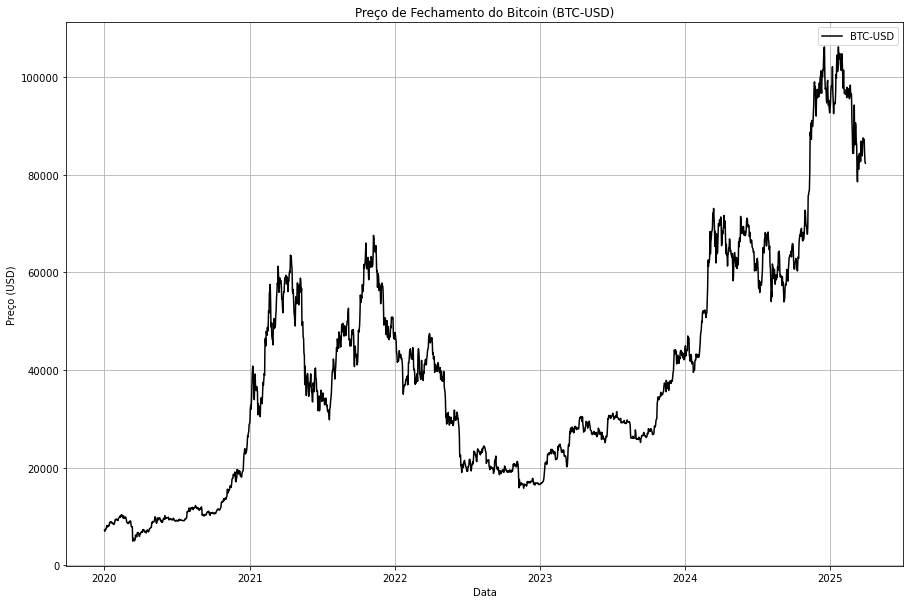

In [6]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['BTC-USD']['Close'], label='BTC-USD', color='black', alpha=1)
plt.title('Preço de Fechamento do Bitcoin (BTC-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

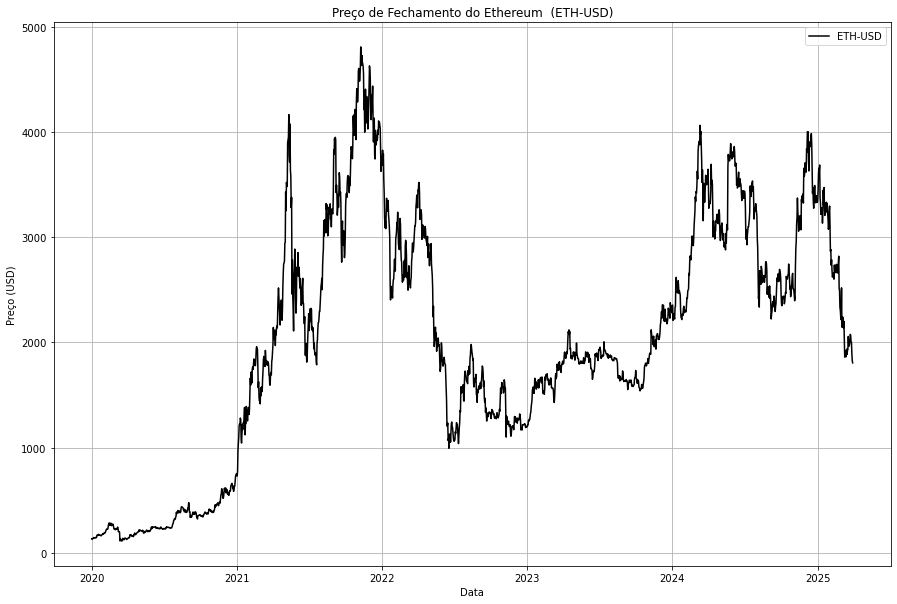

In [19]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['ETH-USD']['Close'], label='ETH-USD', color='black', alpha=1)
plt.title('Preço de Fechamento do Ethereum  (ETH-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

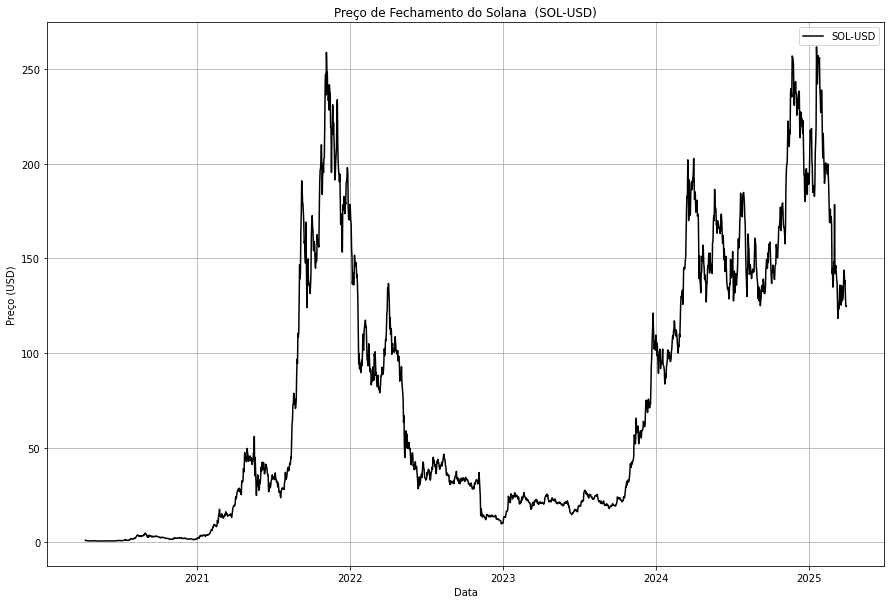

In [20]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['SOL-USD']['Close'], label='SOL-USD', color='black', alpha=1)
plt.title('Preço de Fechamento do Solana  (SOL-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

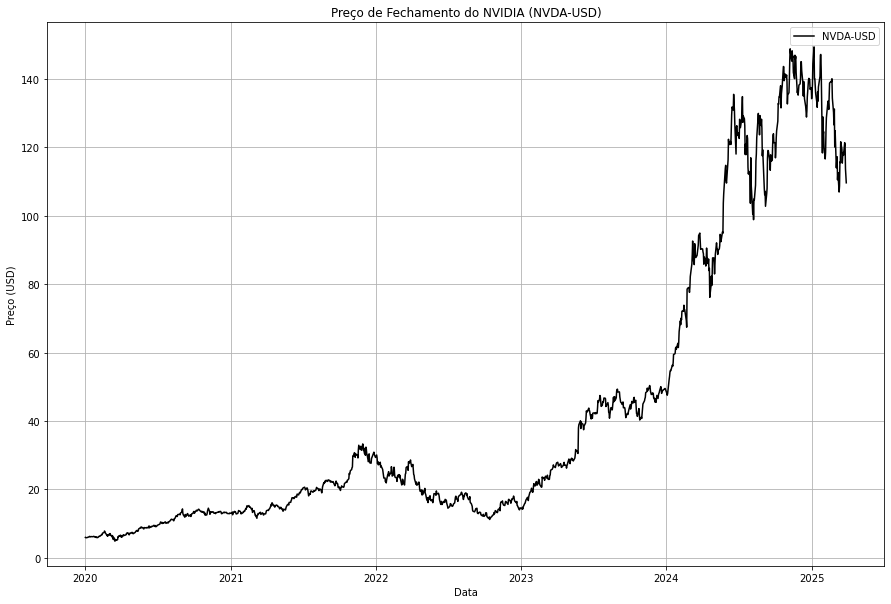

In [21]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['NVDA']['Close'], label='NVDA-USD', color='black', alpha=1)
plt.title('Preço de Fechamento do NVIDIA (NVDA-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

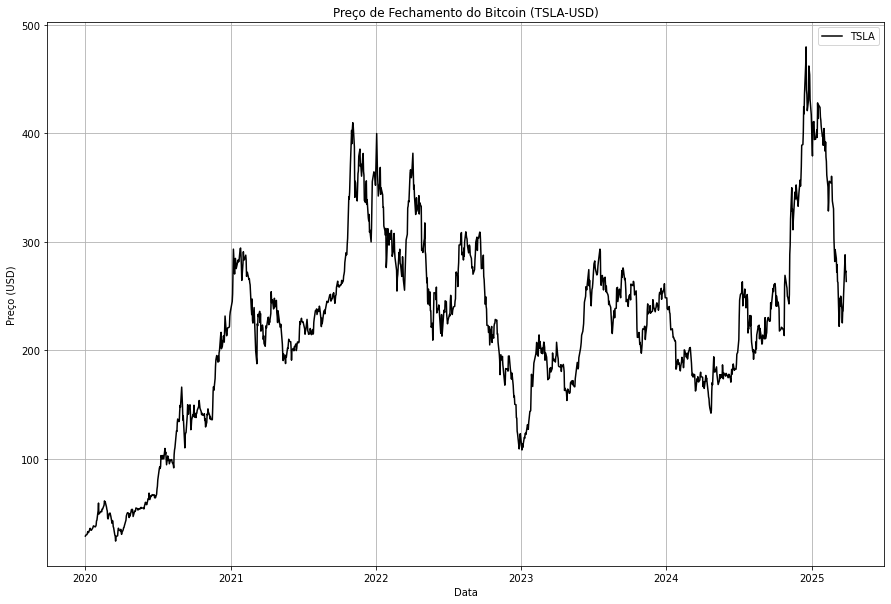

In [22]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['TSLA']['Close'], label='TSLA', color='black', alpha=1)
plt.title('Preço de Fechamento do Bitcoin (TSLA-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

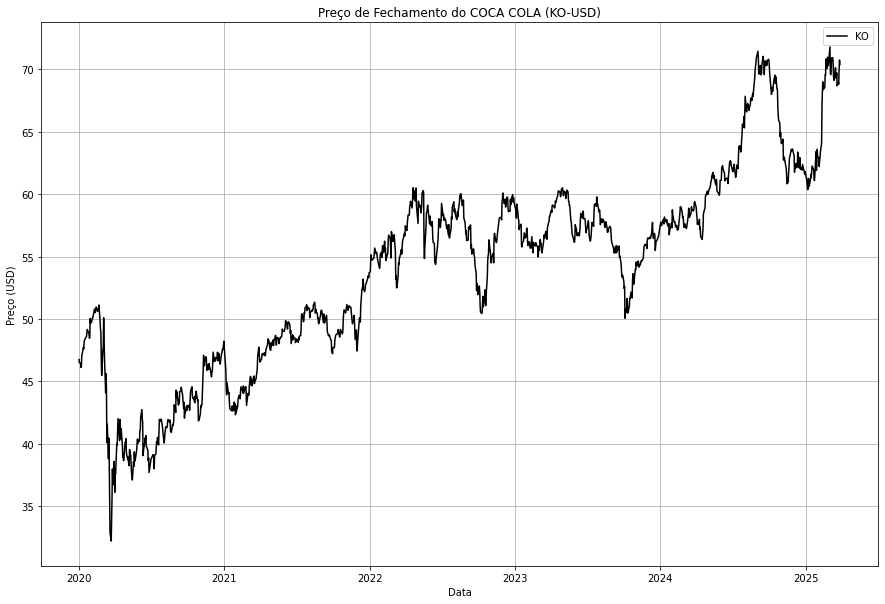

In [23]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['KO']['Close'], label='KO', color='black', alpha=1)
plt.title('Preço de Fechamento do COCA COLA (KO-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

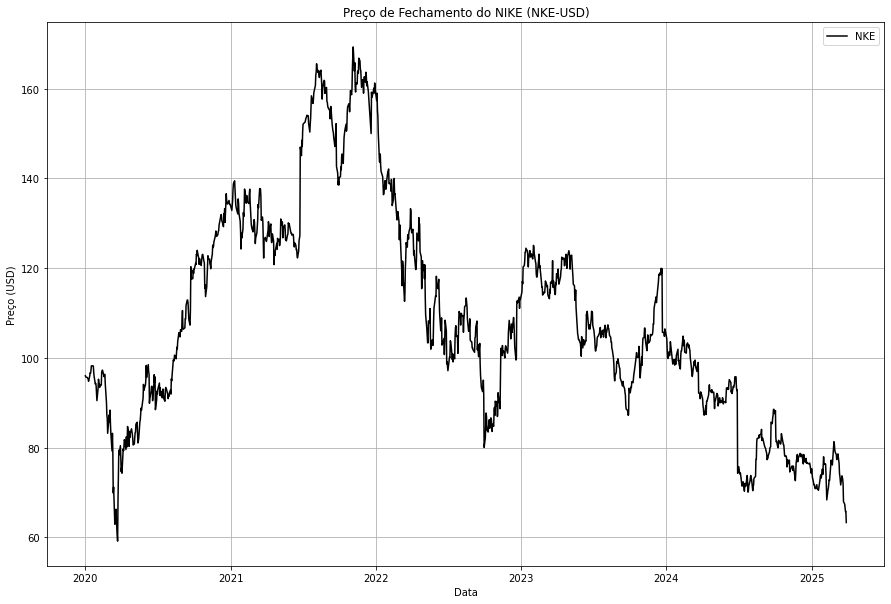

In [24]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['NKE']['Close'], label='NKE', color='black', alpha=1)
plt.title('Preço de Fechamento do NIKE (NKE-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

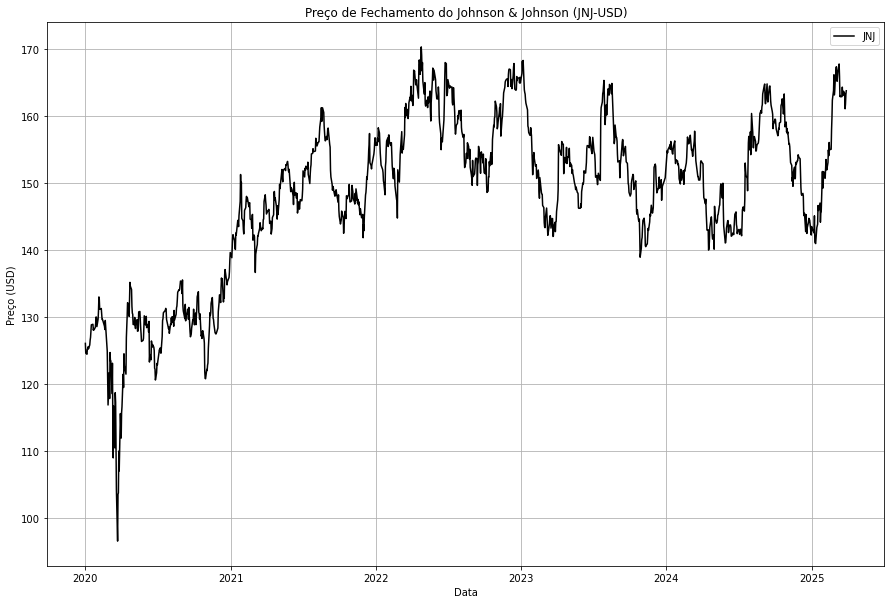

In [25]:
plt.figure(figsize=(15, 10)) 
plt.plot(data['JNJ']['Close'], label='JNJ', color='black', alpha=1)
plt.title('Preço de Fechamento do Johnson & Johnson (JNJ-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

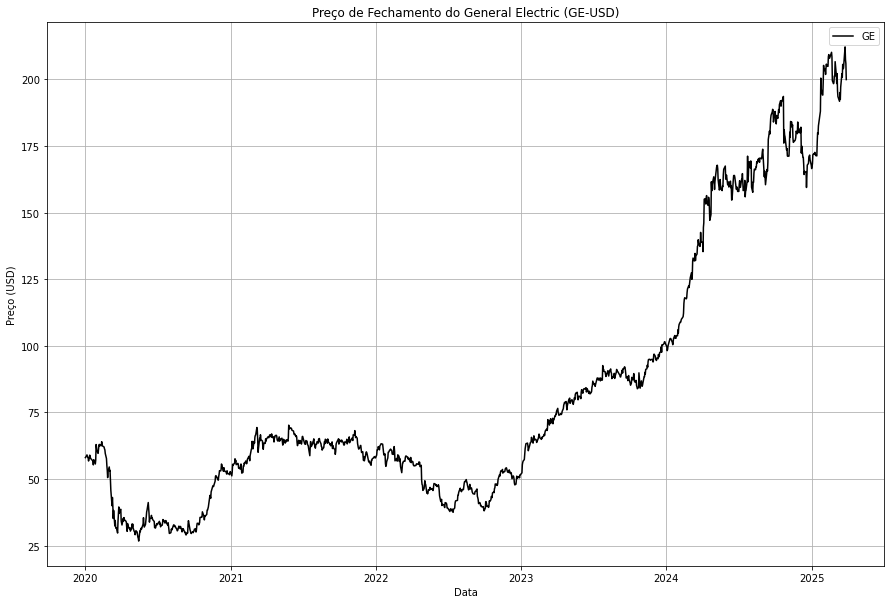

In [26]:

plt.figure(figsize=(15, 10)) 
plt.plot(data['GE']['Close'], label='GE', color='black', alpha=1)
plt.title('Preço de Fechamento do General Electric (GE-USD)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

# Passo 1: Baixar os dados
symbols = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'NVDA', 'TSLA', 'NKE', 'JNJ', 'KO', 'GE']
data = {}

for symbol in symbols:
    tmp_data = yf.download(symbol, 
                           start='2020-01-01', 
                           end='2025-03-31',
                           progress=False)
    
    tmp_data = tmp_data.drop(columns=['Adj Close', 'Volume'], errors='ignore')
    data[symbol] = tmp_data


# Passo 2: Cálculo da EMA
def calculate_ema(series, period):
    return series.ewm(span=period, adjust=False).mean()

# Passo 3: Cálculo do ADX
def calculate_adx(df_asset, period=14):
    high = df_asset['High']
    low = df_asset['Low']
    close = df_asset['Close']

    up_move = high.diff()
    down_move = low.diff()

    plus_dm = pd.Series(np.where((up_move > down_move) & (up_move > 0), up_move, 0.0), index=df_asset.index)
    minus_dm = pd.Series(np.where((down_move > up_move) & (down_move > 0), down_move, 0.0), index=df_asset.index)

    tr1 = high - low
    tr2 = (high - close.shift()).abs()
    tr3 = (low - close.shift()).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=period).mean()

    plus_di = 100 * plus_dm.rolling(window=period).sum() / atr
    minus_di = 100 * minus_dm.rolling(window=period).sum() / atr
    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)).replace([np.inf, -np.inf], 0) * 100
    adx = dx.rolling(window=period).mean().fillna(0)

    return adx


# Passo 4: Backtest
def backtest(data_dict, ticker, adx_thresh, ema_period):
    df = data_dict[ticker].copy().dropna()

    if df.empty or len(df) < ema_period + 15:
        return np.nan, np.nan

    df['EMA'] = calculate_ema(df['Close'], ema_period)
    df['ADX'] = calculate_adx(df)

    df['Signal'] = 0
    df.loc[(df['Close'] > df['EMA']) & (df['ADX'] > adx_thresh), 'Signal'] = 1
    df.loc[(df['Close'] < df['EMA']) & (df['ADX'] > adx_thresh), 'Signal'] = -1

    df['Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy'] = df['Signal'].shift(1) * df['Return']
    df['Buy & Hold'] = df['Return']

    df.dropna(inplace=True)

    if df.empty:
        return np.nan, np.nan

    strategy_return = np.exp(df['Strategy'].cumsum()).iloc[-1]
    buy_hold_return = np.exp(df['Buy & Hold'].cumsum()).iloc[-1]

    return strategy_return, buy_hold_return

# Exemplo: Calcular o ADX para TSLA
df_tsla = data['TSLA']
adx_tsla = calculate_adx(df_tsla)
print(adx_tsla.tail())

# Exemplo: Rodar backtest
sr, bh = backtest(data, 'TSLA', adx_thresh=20, ema_period=20)
print(f"Retorno da Estratégia: {sr:.2f}, Buy & Hold: {bh:.2f}")


ValueError: Data must be 1-dimensional, got ndarray of shape (1317, 1) instead

In [10]:
symbols = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'NVDA', 'TSLA', 'NKE', 'JNJ', 'KO', 'GE']
Pr = pd.DataFrame()
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2020-01-01', 
                      end='2022-03-31', 
                      progress=False)['Close']
    Pr = pd.concat([Pr, tmp_close], axis=1)
Pr.columns=symbols

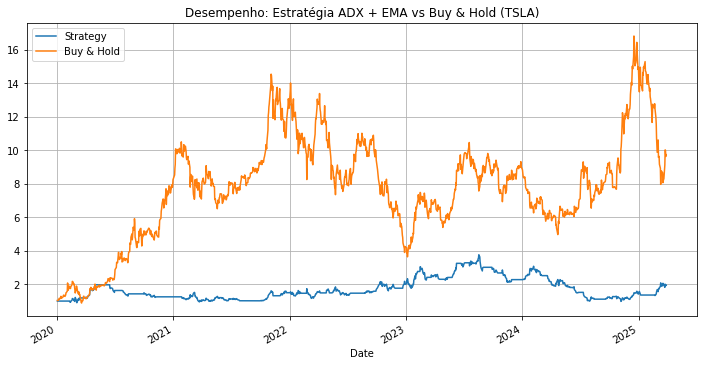

In [12]:
# -------------------------------------------
# Coleta de dados para os 9 ativos
# -------------------------------------------
symbols = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'NVDA', 'TSLA', 'NKE', 'JNJ', 'KO', 'GE']
data = {}

for symbol in symbols:
    tmp_data = yf.download(symbol, start='2020-01-01', end='2025-03-31', progress=False)

    if tmp_data.empty:
        print(f"⚠️ Dados vazios para {symbol}")
        continue

    # Remove colunas desnecessárias e renomeia corretamente
    tmp_data = tmp_data.drop(columns=['Adj Close', 'Volume'], errors='ignore')
    tmp_data.columns = ['Open', 'High', 'Low', 'Close']  # garantido!
    tmp_data.dropna(inplace=True)

    data[symbol] = tmp_data


# -------------------------------------------
# Função para cálculo do ADX
# -------------------------------------------
def calculate_adx(df, period=14):
    high = df['High']
    low = df['Low']
    close = df['Close']

    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm = np.where((plus_dm > minus_dm) & (plus_dm > 0), plus_dm, 0.0)
    minus_dm = np.where((minus_dm > plus_dm) & (minus_dm > 0), minus_dm, 0.0)

    tr1 = high - low
    tr2 = (high - close.shift()).abs()
    tr3 = (low - close.shift()).abs()
    
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=period).mean()

    plus_di = 100 * pd.Series(plus_dm, index=df.index).rolling(window=period).sum() / atr
    minus_di = 100 * pd.Series(minus_dm, index=df.index).rolling(window=period).sum() / atr
    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)).replace([np.inf, -np.inf], 0) * 100
    adx = dx.rolling(window=period).mean().fillna(0)

    return adx

# -------------------------------------------
# Função de backtest: ADX + EMA
# -------------------------------------------
def backtest(df, adx_thresh=25, ema_period=10):
    if df.empty or df.shape[0] < 50:
        raise ValueError("Dados insuficientes para backtest.")

    df = df.copy()
    df['EMA'] = df['Close'].ewm(span=ema_period, adjust=False).mean()
    df['ADX'] = calculate_adx(df)

    # Sinal de compra/venda
    df['Signal'] = 0
    df.loc[(df['Close'] > df['EMA']) & (df['ADX'] > adx_thresh), 'Signal'] = 1
    df.loc[(df['Close'] < df['EMA']) & (df['ADX'] > adx_thresh), 'Signal'] = -1

    df['Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy'] = df['Signal'].shift(1) * df['Return']
    df['Buy & Hold'] = df['Return']

    # Retorno acumulado
    result = df[['Strategy', 'Buy & Hold']].cumsum().apply(np.exp)
    return result

# -------------------------------------------
# Exemplo de uso com TSLA
# -------------------------------------------
result = backtest(data['TSLA'])

# Visualização
result.plot(title='Desempenho: Estratégia ADX + EMA vs Buy & Hold (TSLA)', figsize=(12,6))
plt.grid()
plt.show()